## Install the required packages

In [ ]:
!pip install --upgrade pip

!pip install numpy
!pip install pandas
!pip install openpyxl
!pip install ipykernel
!pip install tabulate
!pip install autopep8
!pip install radon
!pip install matplotlib
!pip install mycolorpy
!pip install networkx
!pip install nbformat


## Import project modules

In [1]:
import sys
sys.path.append("./source/")
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.colors as mcolors
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import pandas as pd
import numpy as np

# for the "Revealed vaccine preferences by rejection and re-selection"
import networkx as nx

rcParams['font.family'] = 'Sans'

from World import World
from Constants import Constants
from VaccineWarehouse import VaccineWarehouse
from Population import Population
from Config import VaccineApproach
from DataHandler import DataHandler
from COVIDsim import COVIDsim

## Initialize config

In [2]:
Constants.currentCfg = Constants.execConfig
dh = DataHandler(Constants.data_folder, Constants.output_folder)

## Initialize objects and Run the simulation

In [3]:
# Preference based World creation
warehouse = VaccineWarehouse()
population = Population()
population.generate_representative_population(Constants.currentCfg.population_size, warehouse.vaccine_list)

world = World(warehouse, population)

covid1 = COVIDsim()
covid1.simulate(world, VaccineApproach.PREFERENCE_BASED_VACCINE, 0, True, True)

# Random Vaccine World creation
warehouse2 = VaccineWarehouse()
population2 = Population()
population2.generate_representative_population(Constants.currentCfg.population_size, warehouse.vaccine_list)

world2 = World(warehouse2, population2)

covid2 = COVIDsim()
covid2.simulate(world2, VaccineApproach.RANDOM_VACCINE, 0, True, True)

## Check simulation complexity

Explanation:
- cc is the radon command to compute Cyclomatic Complexity
- a tells radon to calculate the average complexity at the end. Note that the average is computed among the shown blocks. If you want the total average, among all the blocks, regardless of what is being shown, you should use --total-average.
- nc tells radon to print only results with a complexity rank of C or worse. Other examples: -na (from A to F), or -nd (from D to F).
The letter in front of the line numbers represents the type of the block (F means function, M method and C class).


Source: 
 + https://pypi.org/project/radon/
 + https://radon.readthedocs.io/en/latest/commandline.html


In [4]:
!echo __________________ Raw metrics __________________
!radon raw source
!echo __________________ Cyclomatic Complexity __________________
!radon cc source -a -nc
!echo __________________ Maintainability Index __________________
!radon mi source

__________________ Raw metrics __________________
source\Config.py
    LOC: 57
    LLOC: 35
    SLOC: 20
    Comments: 3
    Single comments: 0
    Multi: 20
    Blank: 17
    - Comment Stats
        (C % L): 5%
        (C % S): 15%
        (C + M % L): 40%
source\Constants.py
    LOC: 64
    LLOC: 13
    SLOC: 54
    Comments: 1
    Single comments: 0
    Multi: 3
    Blank: 7
    - Comment Stats
        (C % L): 2%
        (C % S): 2%
        (C + M % L): 6%
source\COVIDsim.py
    LOC: 207
    LLOC: 124
    SLOC: 123
    Comments: 23
    Single comments: 23
    Multi: 26
    Blank: 35
    - Comment Stats
        (C % L): 11%
        (C % S): 19%
        (C + M % L): 24%
source\DataHandler.py
    LOC: 38
    LLOC: 14
    SLOC: 10
    Comments: 0
    Single comments: 0
    Multi: 19
    Blank: 9
    - Comment Stats
        (C % L): 0%
        (C % S): 0%
        (C + M % L): 50%
source\District.py
    LOC: 99
    LLOC: 56
    SLOC: 49
    Comments: 0
    Single comments: 0
    Multi: 2

## Log results

Preference World:
Average refusal for generated population: 0.2561979186916009
Total ammount of offers: 77163
Vacination ratio: 57394 out of 100000
57.394% vaccinated after 200 day.


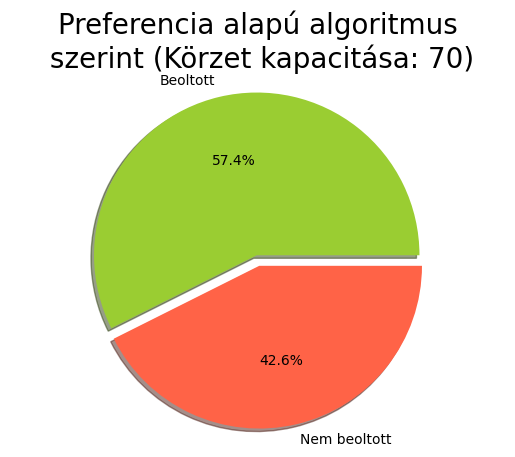

Random World:
Average refusal for generated population: 0.625982218522623
Total ammount of offers: 199421
Vacination ratio: 74587 out of 100000
74.587% vaccinated after 200 day.


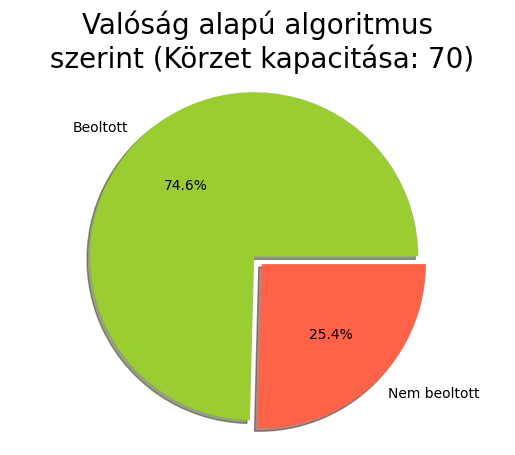

In [4]:
def logger(world: World, title):
    counter = 0
    full_offer_number = 0
    vaccinated = 0

    for p in world.population.people_list:
        counter += p.offered_counter - (1 if p.accepted else 0)
        full_offer_number += p.offered_counter
        if p.accepted:
            vaccinated += 1
            
    vac_per = vaccinated * 100.0 / len(world.population.people_list)
    print(f"Average refusal for generated population: {counter / full_offer_number}")
    print(f"Total ammount of offers: {full_offer_number}")
    print(f"Vacination ratio: {vaccinated} out of {len(world.population.people_list)}")
    print(f"{vac_per}% vaccinated after {Constants.currentCfg.execution_time} day.")
    
    labels = 'Beoltott', 'Nem beoltott'
    sizes = [vaccinated, len(world.population.people_list) - vaccinated]
    explode = (0.1, 0)
    colors = ['yellowgreen', 'tomato']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%',
            shadow = True, startangle = 0, radius = 1.5)
    ax1.axis('equal')

    plt.title(title, fontsize = 20)
    plt.show()

print("Preference World:")
logger(world, f'Preferencia alapú algoritmus\n szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})')

print("Random World:")
logger(world2, f'Valóság alapú algoritmus\n szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})')

## What percentage of people have an empty preference list

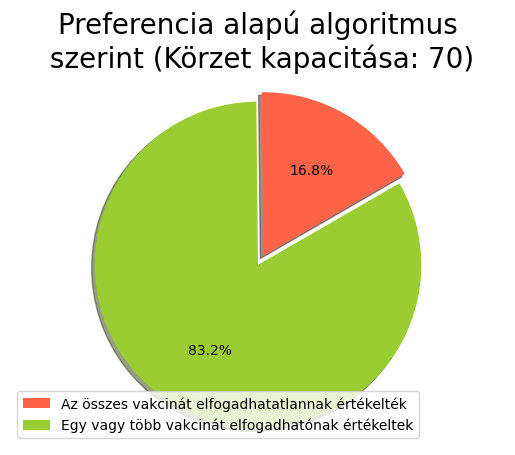

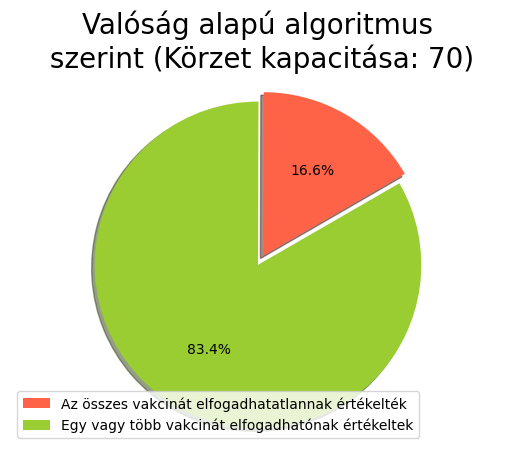

In [5]:
def logger2(world: World, title):
    empty_pref = 0
    not_empty_pref = 0

    for p in world.population.people_list:
        if not p.preference_list:
            empty_pref += 1
        else:
            not_empty_pref += 1

    labels = 'Az összes vakcinát elfogadhatatlannak értékelték', 'Egy vagy több vakcinát elfogadhatónak értékeltek'
    sizes = [empty_pref, not_empty_pref]
    explode = (0.1, 0)
    colors = ['tomato', 'yellowgreen']

    fig1, ax1 = plt.subplots()
    pie = ax1.pie(sizes, explode = explode, colors = colors, autopct = '%1.1f%%',
            shadow = True, startangle = 30, radius = 1.5)
    ax1.axis('equal')

    plt.title(title, fontsize = 20)
    plt.legend(labels=labels)
    plt.show()

logger2(world, f'Preferencia alapú algoritmus\n szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})')
logger2(world2, f'Valóság alapú algoritmus\n szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})')

### Final vaccination ratio compared to vaccine types

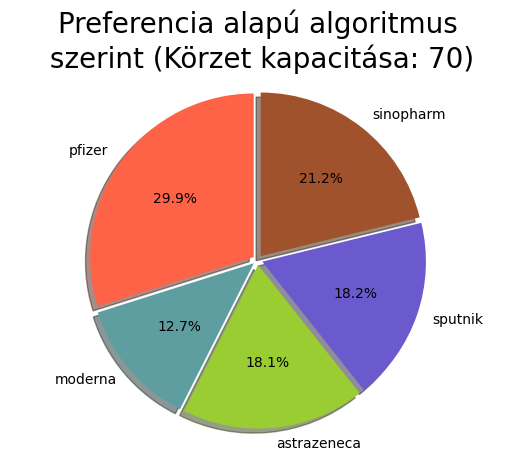

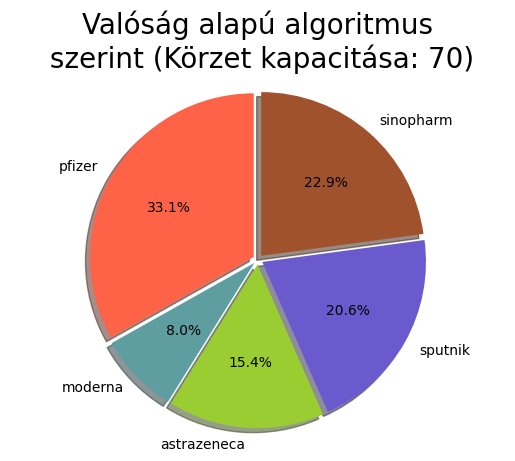

In [6]:
def print1(world: World, title):
    vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
    chosen_vaccine = [0] * len(vaccine_name_list)
    _chosen_vaccine = [0] * len(vaccine_name_list)
    vaccinated = 0

    for p in world.population.people_list:
        if p.accepted:
            vaccinated += 1
        for vi in range(len(vaccine_name_list)):
            if vaccine_name_list[vi] == p.selected_vaccine:
                chosen_vaccine[vi] += 1
                break
            
    for v in range(len(chosen_vaccine)):
        _chosen_vaccine[v] = chosen_vaccine[v] / vaccinated
    
    colors = ['tomato', 'cadetblue', 'yellowgreen', 'slateblue', 'sienna']
    fig1, ax1 = plt.subplots()
    explode = (0.03, 0.03, 0.03, 0.03, 0.03)
    ax1.pie(_chosen_vaccine, explode = explode, labels = vaccine_name_list, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
    ax1.axis('equal')

    plt.title(title, fontsize = 20)
    plt.show()

print1(world, f'Preferencia alapú algoritmus\n szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})') #pref
print1(world2, f'Valóság alapú algoritmus\n szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})') #rand

### Refusal ratio compared to vaccine types

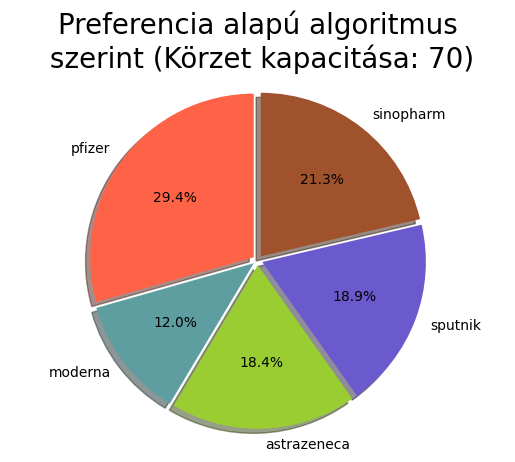

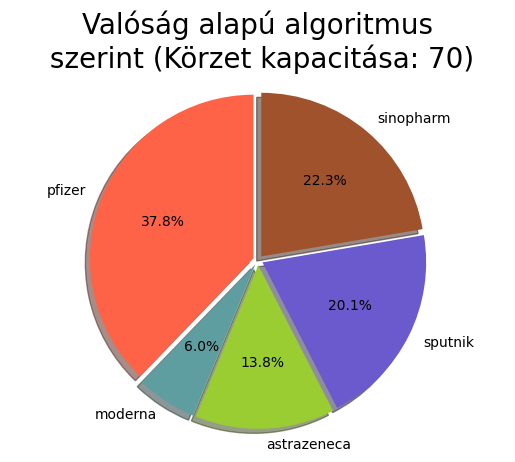

In [7]:
def print2(world: World, title):
    vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
    refused_vaccine = [0] * len(vaccine_name_list)
    _refused_vaccine = [0] * len(vaccine_name_list)
    ref_all = 0

    for dl in world.district_list:
        for vl in dl.vaccine_list:
            for vi in range(len(vaccine_name_list)):
                if vaccine_name_list[vi] == vl.name:
                    refused_vaccine[vi] += vl.refused_counter
                    break
    
    for p in refused_vaccine:
        ref_all += p
        
    for v in range(len(refused_vaccine)):
        _refused_vaccine[v] = refused_vaccine[v] / ref_all

    colors = ['tomato', 'cadetblue', 'yellowgreen', 'slateblue', 'sienna']
    fig1, ax1 = plt.subplots()
    explode = (0.03, 0.03, 0.03, 0.03, 0.03)
    ax1.pie(_refused_vaccine, explode = explode, labels = vaccine_name_list, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
    ax1.axis('equal')
    
    plt.title(title, fontsize = 20)
    plt.show()

print2(world, f'Preferencia alapú algoritmus\n szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})') #pref
print2(world2, f'Valóság alapú algoritmus\n szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})') #rand

### What did people who changed their mind accept at the end?

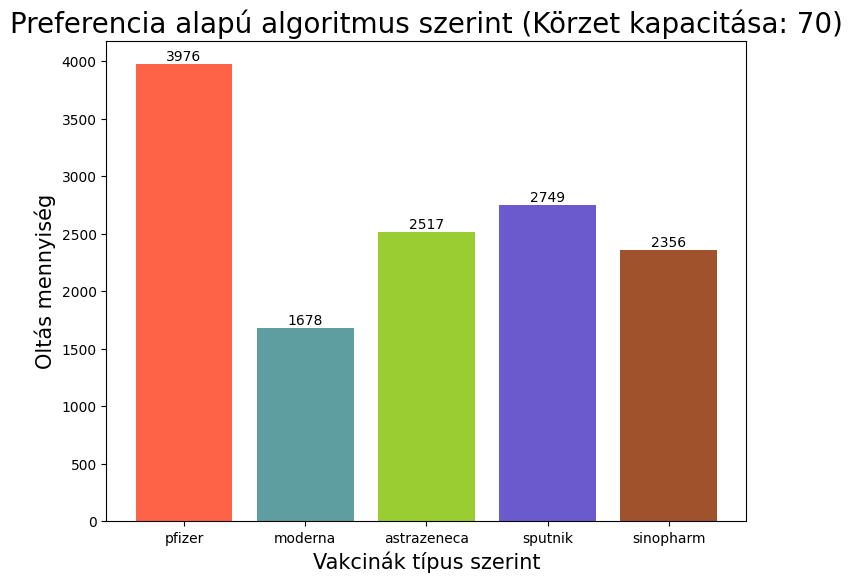

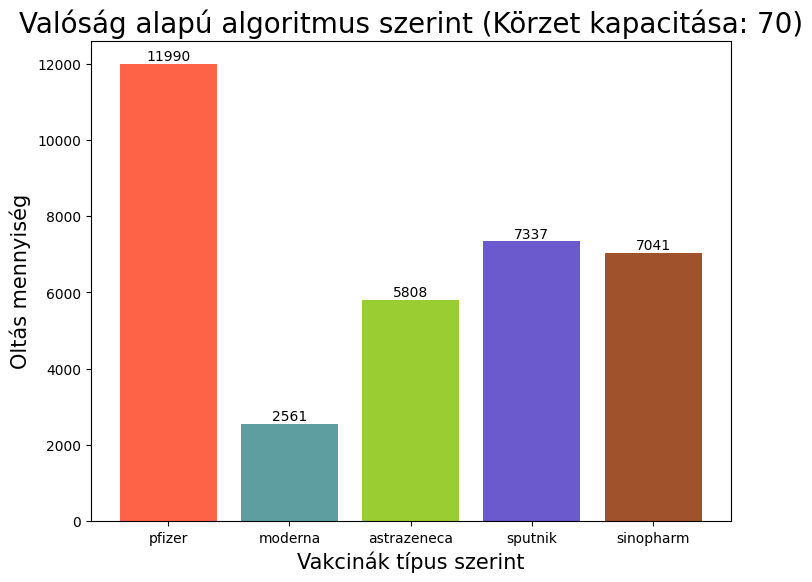

In [8]:
def print3(world: World, title):
    vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
    chosen_vaccine = [0] * len(vaccine_name_list)

    for p in world.population.people_list:
        for vi in range(len(vaccine_name_list)):
            if vaccine_name_list[vi] == p.selected_vaccine and p.offered_counter > 1:
                chosen_vaccine[vi] += 1
                break

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax_bar = ax.bar(vaccine_name_list, chosen_vaccine, color = ['tomato', 'cadetblue', 'yellowgreen', 'slateblue', 'sienna'])
    ax.set_xlabel('Vakcinák típus szerint', fontsize = 15)
    ax.set_ylabel('Oltás mennyiség', fontsize = 15)

    temps = ax_bar
    labels = [f"{chosen_vaccine[i]}" for i in range(len(temps))]

    for temp, label in zip(temps, labels):
        height = temp.get_height()
        ax.text(
            temp.get_x() + temp.get_width() / 2, height + 5, label, ha = "center", va = "bottom"
        )

    plt.title(title, fontsize = 20)
    plt.show()

print3(world, f'Preferencia alapú algoritmus szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})') #pref
print3(world2, f'Valóság alapú algoritmus szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})') #rand

### How did the vaccination ratio changed depending on time?

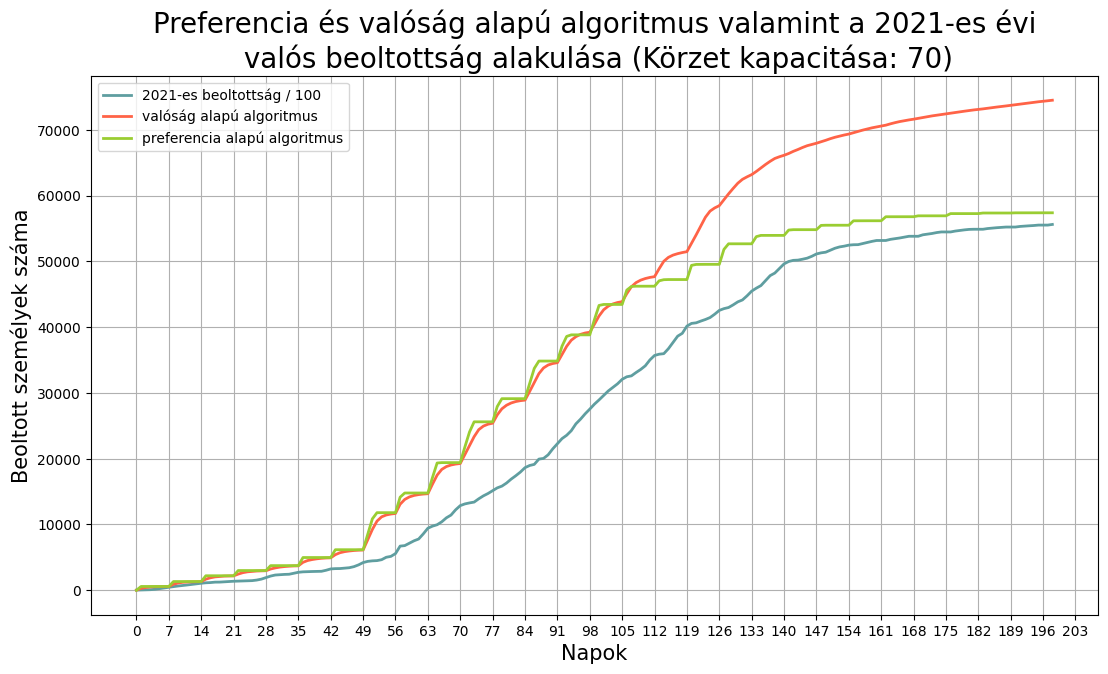

In [9]:
# Real, preference and random simulation vaccination ratio change compared to simulation.

vacc_num_list = []
vacc_num = 0
real_vaccinations = dh.from_xlsx(Constants.real_vacc_file)
last_date = datetime.strptime(Constants.currentCfg.shipment_start_date, "%Y-%m-%d")

for i in range(len(covid1.vaccination_progress)):
    currentDate = last_date + timedelta(days = 1)

    idx = real_vaccinations.index[pd.to_datetime(real_vaccinations["date"]) == currentDate].tolist()[0]

    vacc_num += real_vaccinations["first_vacc_num"].values[idx]
    vacc_num_list.append(vacc_num / Constants.currentCfg.vaccine_divider)
    last_date = currentDate

days = list(range(0, len(covid1.vaccination_progress)))
days1 = list(range(0, len(covid1.vaccination_progress)))
days2 = list(range(0, len(covid2.vaccination_progress)))

plt.figure(figsize=(13, 7))
plt.plot(days, vacc_num_list, color = "cadetblue", label = f'2021-es beoltottság / {Constants.currentCfg.vaccine_divider}', linewidth = 2)
plt.plot(days2, covid2.vaccination_progress, color = "tomato", label = 'valóság alapú algoritmus', linewidth = 2) 
plt.plot(days1, covid1.vaccination_progress, color = "yellowgreen", label = 'preferencia alapú algoritmus', linewidth = 2)
plt.xlabel('Napok', fontsize = 15)
plt.ylabel('Beoltott személyek száma', fontsize = 15)

plt.xticks(np.arange(0, Constants.currentCfg.execution_time + Constants.currentCfg.shipment_frequency, Constants.currentCfg.shipment_frequency))
plt.grid(True)
plt.title(f'Preferencia és valóság alapú algoritmus valamint a 2021-es évi\n valós beoltottság alakulása (Körzet kapacitása: {Constants.currentCfg.district_capacity})', fontsize = 20)
plt.legend()
plt.show()

### How did the vaccination ratio changed depending on time with multiple increasing district_capacity?

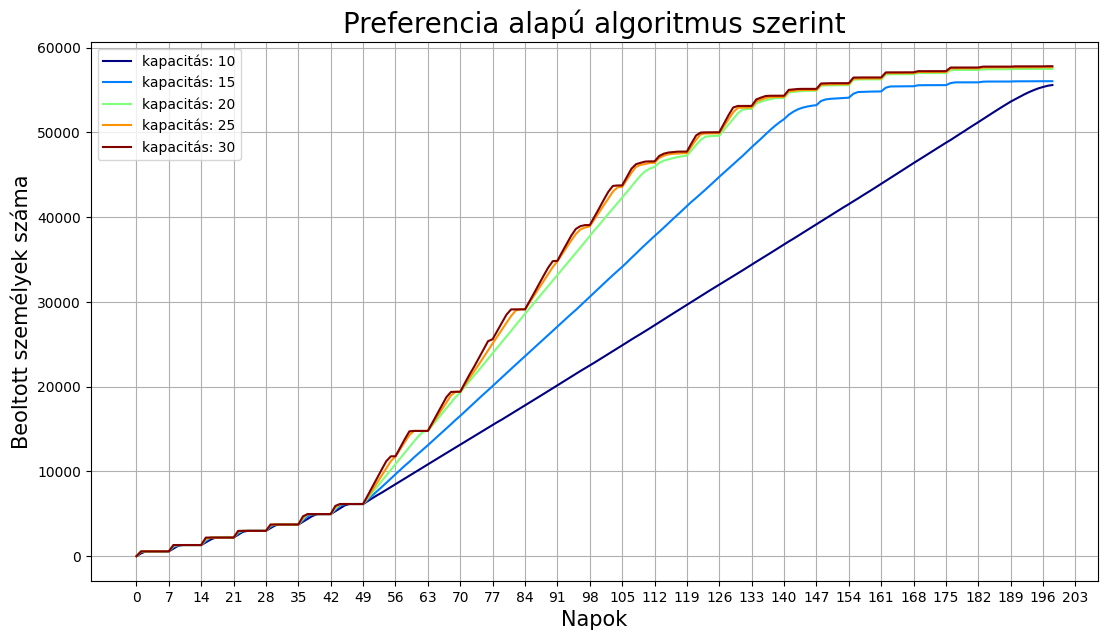

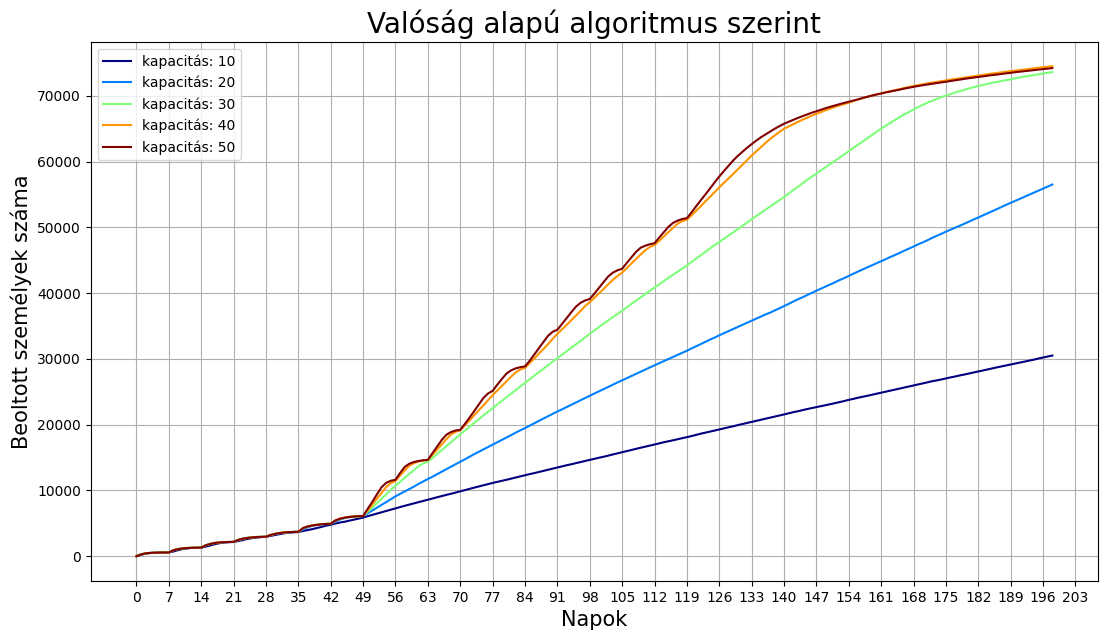

In [14]:
def district_increase_test3() -> COVIDsim:
    warehouse3 = VaccineWarehouse()
    population3 = Population()
    population3.generate_representative_population(Constants.currentCfg.population_size, warehouse.vaccine_list)

    world3 = World(warehouse3, population3)

    covid3 = COVIDsim()
    covid3.simulate(world3, VaccineApproach.PREFERENCE_BASED_VACCINE, 0, True)
    return covid3

def district_increase_test4() -> COVIDsim:
    warehouse4 = VaccineWarehouse()
    population4 = Population()
    population4.generate_representative_population(Constants.currentCfg.population_size, warehouse.vaccine_list)

    world4 = World(warehouse4, population4)

    covid4 = COVIDsim()
    covid4.simulate(world4, VaccineApproach.RANDOM_VACCINE, 0, True)
    return covid4

def print4(district_increase_test, title, divider):
    days = list(range(0, len(covid1.vaccination_progress)))

    capacity_backup = Constants.currentCfg.district_capacity

    starting_capacity = 10
    Constants.currentCfg.district_capacity = starting_capacity

    colors = mcp.gen_color(cmap = "jet", n= 5)
    plt.figure(figsize=(13, 7))
    for i in range(5):
        temp_covid = district_increase_test()
        plt.plot(days, temp_covid.vaccination_progress, 
                color = (colors[i]), 
                label = f'kapacitás: {Constants.currentCfg.district_capacity}')
        Constants.currentCfg.district_capacity += int(starting_capacity/divider)
        
    Constants.currentCfg.district_capacity = capacity_backup
    
    plt.xlabel('Napok', fontsize = 15)
    plt.ylabel('Beoltott személyek száma', fontsize = 15)

    plt.xticks(np.arange(0, Constants.currentCfg.execution_time + Constants.currentCfg.shipment_frequency, Constants.currentCfg.shipment_frequency))
    plt.grid(True)
    plt.title(title, fontsize = 20)
    plt.legend()
    plt.show()

print4(district_increase_test3, f'Preferencia alapú algoritmus szerint', 2) #pref
print4(district_increase_test4, f'Valóság alapú algoritmus szerint', 1) #rand

### Vaccine reduction over time

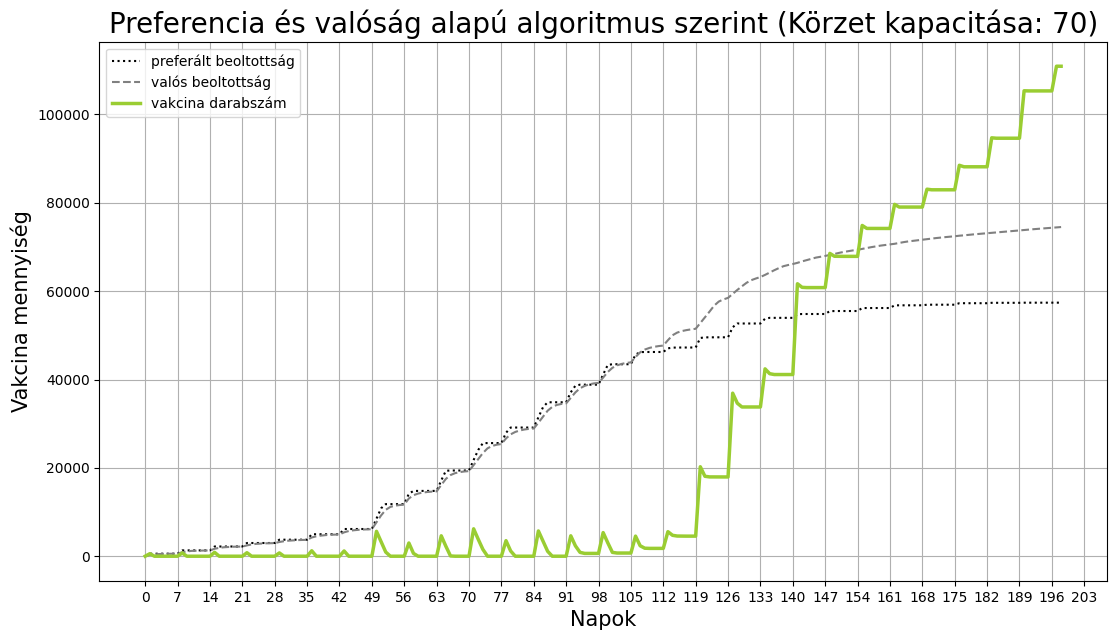

In [10]:
# this is the total amount of vaccines in the districts, the warehouse is not included

def print5(covid, color: str, title):
    days = list(range(0, len(covid.vaccination_progress)))
    days1 = list(range(0, len(covid1.vaccination_progress)))
    days2 = list(range(0, len(covid2.vaccination_progress)))

    plt.figure(figsize = (13, 7))
    plt.plot(days1, covid1.vaccination_progress, 'k:', label = 'preferált beoltottság')
    plt.plot(days2, covid2.vaccination_progress, '--', color = "grey", label = 'valós beoltottság') 
    plt.plot(days, covid.vaccines_amount, color = color, label = 'vakcina darabszám', linewidth = 2.5)
    plt.xlabel('Napok', fontsize = 15)
    plt.ylabel('Vakcina mennyiség', fontsize = 15)
    
    plt.xticks(np.arange(0, Constants.currentCfg.execution_time + Constants.currentCfg.shipment_frequency, Constants.currentCfg.shipment_frequency))
    plt.grid(True)
    plt.title(title, fontsize = 20)
    plt.legend()
    plt.show()
    
print5(covid1, "yellowgreen", f'Preferencia és valóság alapú algoritmus szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})')

### Vaccine reduction over time by vaccine types

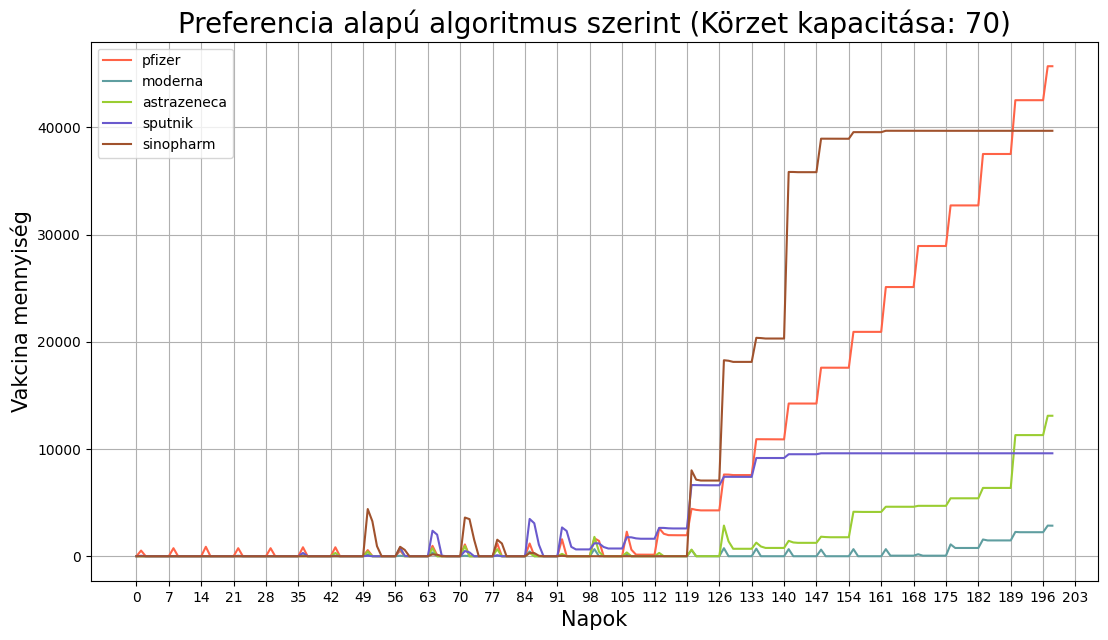

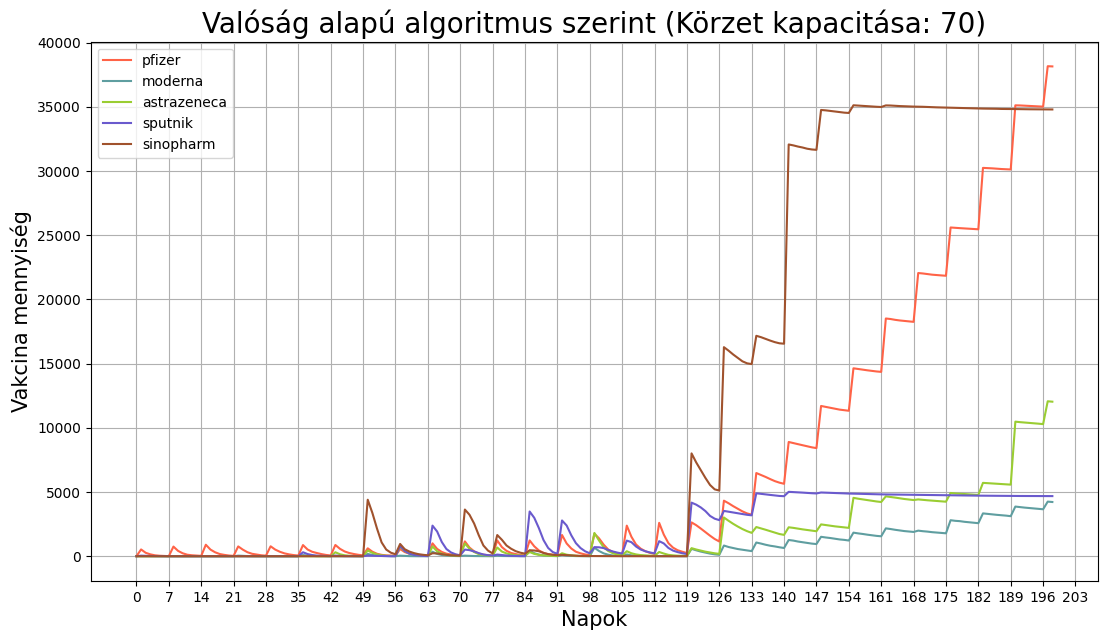

In [11]:
def print6(covid, world, title):
    days = list(range(0, len(covid.vaccination_progress)))
    vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]

    plt.figure(figsize = (13, 7))
    plt.plot(days, covid.pfizer_amount, color = 'tomato', label = f'{vaccine_name_list[0]}', linewidth = 1.5)
    plt.plot(days, covid.moderna_amount, color = 'cadetblue', label = f'{vaccine_name_list[1]}', linewidth = 1.5)
    plt.plot(days, covid.astrazeneca_amount, color = 'yellowgreen', label = f'{vaccine_name_list[2]}', linewidth = 1.5)
    plt.plot(days, covid.sputnik_amount, color = 'slateblue', label = f'{vaccine_name_list[3]}', linewidth = 1.5)
    plt.plot(days, covid.sinopharm_amount, color = 'sienna', label = f'{vaccine_name_list[4]}', linewidth = 1.5)
    plt.xlabel('Napok', fontsize = 15)
    plt.ylabel('Vakcina mennyiség', fontsize = 15)
    
    plt.xticks(np.arange(0, Constants.currentCfg.execution_time + Constants.currentCfg.shipment_frequency, Constants.currentCfg.shipment_frequency))
    plt.grid(True)
    plt.title(title, fontsize = 20)
    plt.legend()
    plt.show()
    
print6(covid1, world, f'Preferencia alapú algoritmus szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})') #pref
print6(covid2, world2, f'Valóság alapú algoritmus szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})') #rand

### Age distribution

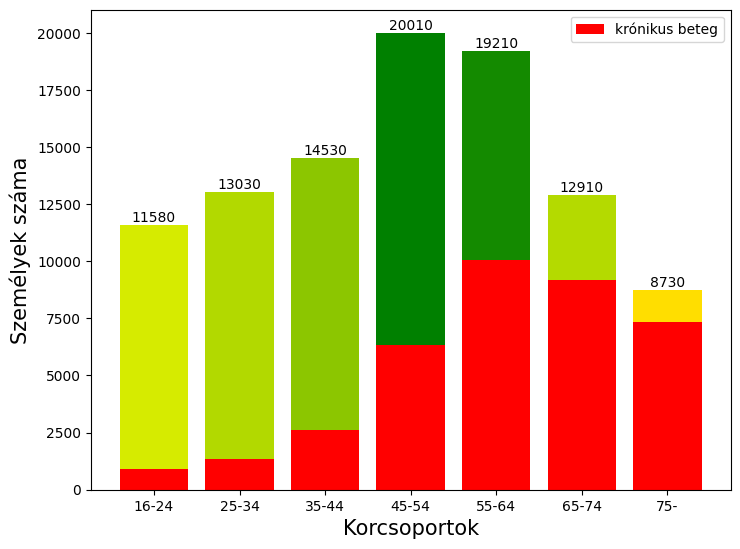

In [13]:
def print7(world: World):
    age_group = [x for x in world.population.representative_population["age_groups"]]
    chosen_age_group = [0] * len(age_group)
    have_chronic_dis = [0] * len(age_group)

    for p in world.population.people_list:
        for a in range(len(age_group)):
            if p.age >= world.population.representative_population["min_age"].values[a] and p.age <= world.population.representative_population["max_age"].values[a]:
                chosen_age_group[a] += 1
                if p.chronic_disease:
                    have_chronic_dis[a] += 1
                break
            
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

    df = pd.DataFrame({"x" : chosen_age_group})
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax_bar_1 = ax.bar(age_group, have_chronic_dis, color ="red", label = "krónikus beteg")
    ax_bar = ax.bar(age_group, df["x"]-have_chronic_dis,  bottom = have_chronic_dis, color = cmap(df.x.values / df.x.values.max()))
    ax.set_xlabel('Korcsoportok', fontsize = 15)
    ax.set_ylabel('Személyek száma', fontsize = 15)

    temps = ax_bar
    temps2 = ax_bar_1
    labels = [f"{chosen_age_group[i]}" for i in range(len(temps))]

    for temp, temp2, label in zip(temps, temps2, labels):
        height = temp.get_height() + temp2.get_height()
        ax.text(
            temp.get_x() + temp.get_width() / 2, height + 5, label, ha = "center", va = "bottom"
        )

    ax.legend()
    plt.show()

print7(world)

### The amount of vaccines offered/refused/accepted compared to vaccine types

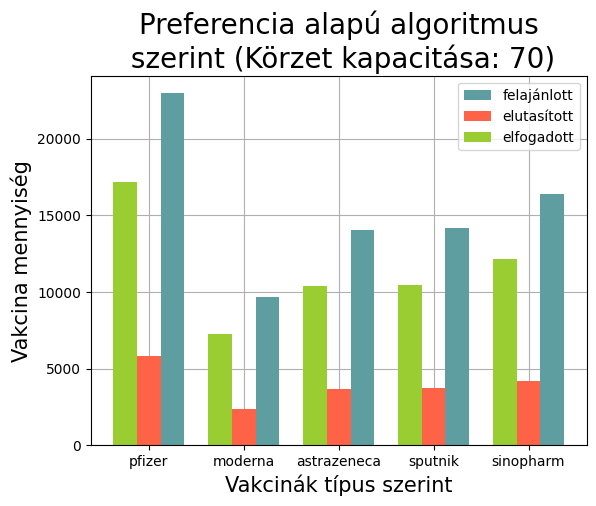

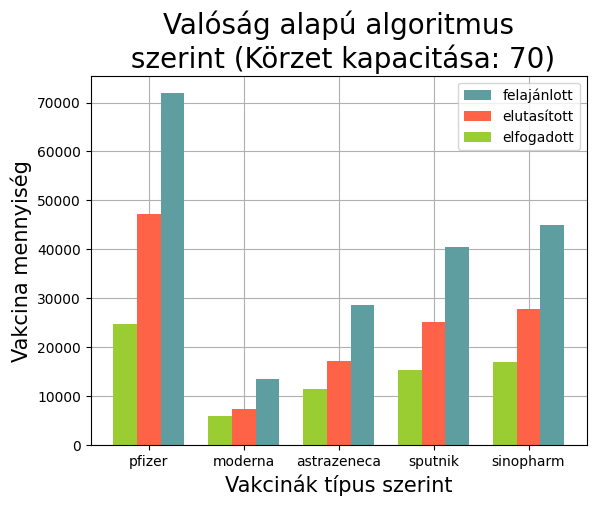

In [12]:
def print8(world: World, title):
    vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
    refused_vaccine = [0] * len(vaccine_name_list)
    chosen_vaccine = [0] * len(vaccine_name_list)
    offered_vaccine = [0] * len(vaccine_name_list)
    x = np.arange(len(vaccine_name_list))

    for p in world.population.people_list:
        for vi in range(len(vaccine_name_list)):
            if vaccine_name_list[vi] == p.selected_vaccine:
                chosen_vaccine[vi] += 1
                break

    for dl in world.district_list:
        for vl in dl.vaccine_list:
            for vi in range(len(vaccine_name_list)):
                if vaccine_name_list[vi] == vl.name:
                    refused_vaccine[vi] += vl.refused_counter
                    offered_vaccine[vi] += vl.offered_counter
                    break

    fig, ax = plt.subplots()
    
    ax_bar3 = ax.bar(x + 0.25, offered_vaccine, color = ['cadetblue'], width = 0.25, label = "felajánlott")
    ax_bar2 = ax.bar(x + 0, refused_vaccine, color = ['tomato'], width = 0.25, label = "elutasított")
    ax_bar1 = ax.bar(x - 0.25, chosen_vaccine, color = ['yellowgreen'], width = 0.25, label = "elfogadott")
    ax.set_xlabel('Vakcinák típus szerint', fontsize = 15)
    ax.set_ylabel('Vakcina mennyiség', fontsize = 15)
    
    plt.title(title, fontsize = 20)
    ax.set_xticks(x, vaccine_name_list)
    ax.legend()
    plt.grid(True)
    ax.set_axisbelow(True)
    plt.show()
    

print8(world, f'Preferencia alapú algoritmus\n szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})') #pref
print8(world2, f'Valóság alapú algoritmus\n szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})') #rand

## Revealed vaccine preferences by rejection and re-selection

0  -  0  :  1.0
0  -  0  :  2.0
2  -  2  :  1.0
0  -  0  :  3.0
1  -  1  :  1.0
0  -  0  :  4.0
1  -  1  :  2.0
2  -  2  :  2.0
1  -  1  :  3.0
0  -  0  :  5.0
2  -  2  :  3.0
0  -  0  :  6.0
0  -  0  :  9.0
3  -  3  :  1.0
1  -  1  :  9.0
0  -  0  :  11.0
1  -  1  :  11.0
0  -  0  :  13.0
0  -  0  :  14.0
4  -  4  :  1.0
0  -  0  :  15.0
1  -  1  :  14.0
1  -  1  :  15.0
0  -  0  :  16.0
1  -  1  :  17.0
0  -  0  :  18.0
0  -  0  :  19.0
4  -  3  :  1.0
3  -  3  :  4.0
0  -  0  :  20.0
0  -  0  :  21.0
0  -  0  :  22.0
0  -  0  :  23.0
2  -  2  :  4.0
0  -  0  :  25.0
2  -  4  :  1.0
3  -  3  :  5.0
1  -  1  :  18.0
0  -  0  :  28.0
0  -  0  :  30.0
2  -  2  :  5.0
3  -  3  :  6.0
3  -  3  :  9.0
2  -  2  :  9.0
0  -  0  :  31.0
0  -  0  :  32.0
2  -  2  :  10.0
0  -  0  :  33.0
1  -  1  :  19.0
0  -  0  :  34.0
3  -  3  :  12.0
1  -  1  :  20.0
2  -  2  :  11.0
2  -  2  :  12.0
3  -  4  :  1.0
3  -  3  :  13.0
4  -  0  :  1.0
0  -  0  :  36.0
0  -  0  :  37.0
2  -  2  :  13.0
0  -  0

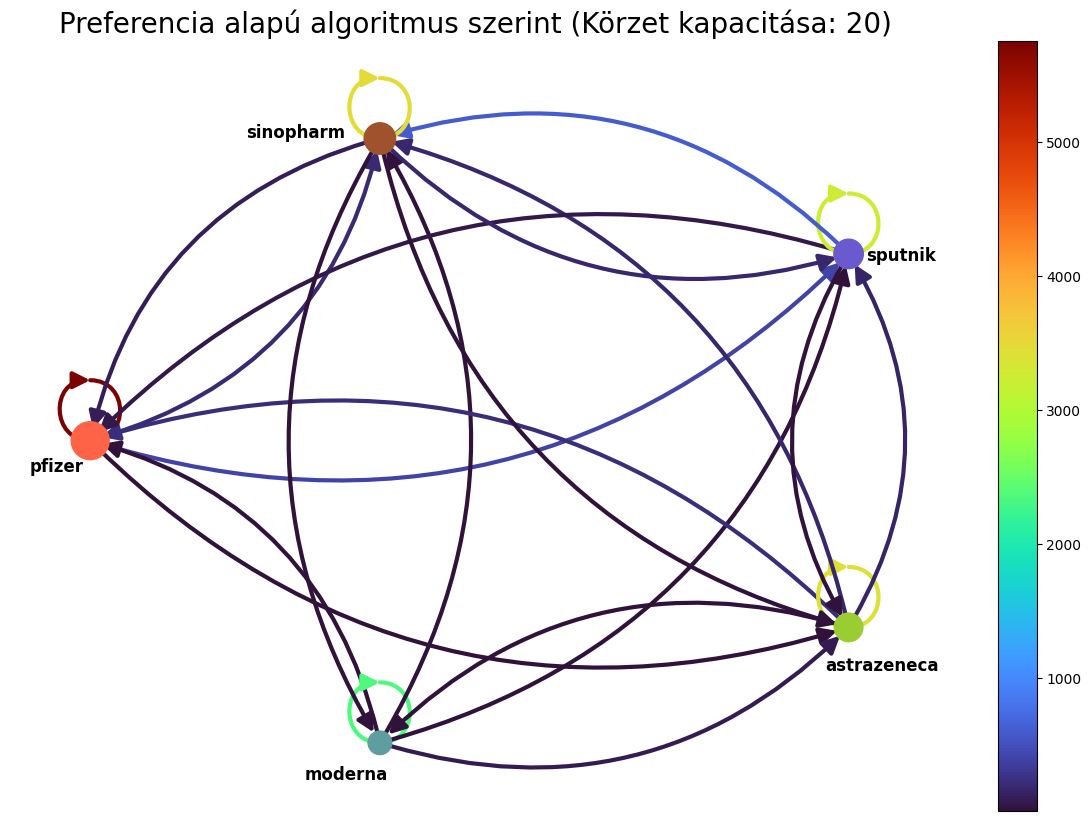

0  -  2  :  17.0
2  -  2  :  1.0
0  -  0  :  20.0
2  -  2  :  3.0
0  -  0  :  24.0
0  -  0  :  25.0
0  -  0  :  40.0
0  -  0  :  42.0
0  -  0  :  46.0
2  -  2  :  13.0
0  -  0  :  65.0
0  -  0  :  67.0
0  -  0  :  69.0
0  -  0  :  72.0
4  -  4  :  8.0
4  -  4  :  9.0
4  -  3  :  3.0
0  -  0  :  77.0
0  -  0  :  81.0
1  -  1  :  2.0
0  -  0  :  82.0
2  -  2  :  17.0
0  -  0  :  83.0
3  -  4  :  8.0
0  -  0  :  84.0
2  -  0  :  16.0
2  -  0  :  23.0
0  -  0  :  85.0
2  -  2  :  18.0
1  -  1  :  3.0
0  -  0  :  93.0
0  -  0  :  96.0
2  -  2  :  19.0
0  -  1  :  17.0
0  -  0  :  114.0
0  -  0  :  116.0
2  -  2  :  20.0
0  -  0  :  121.0
2  -  2  :  26.0
0  -  0  :  122.0
2  -  0  :  27.0
1  -  2  :  9.0
0  -  0  :  123.0
2  -  2  :  28.0
0  -  0  :  124.0
3  -  0  :  15.0
0  -  0  :  125.0
0  -  0  :  127.0
2  -  0  :  34.0
3  -  3  :  6.0
4  -  3  :  4.0
0  -  0  :  129.0
0  -  0  :  130.0
0  -  0  :  131.0
0  -  0  :  133.0
4  -  4  :  11.0
1  -  1  :  4.0
3  -  3  :  15.0
0  -  0  :  13

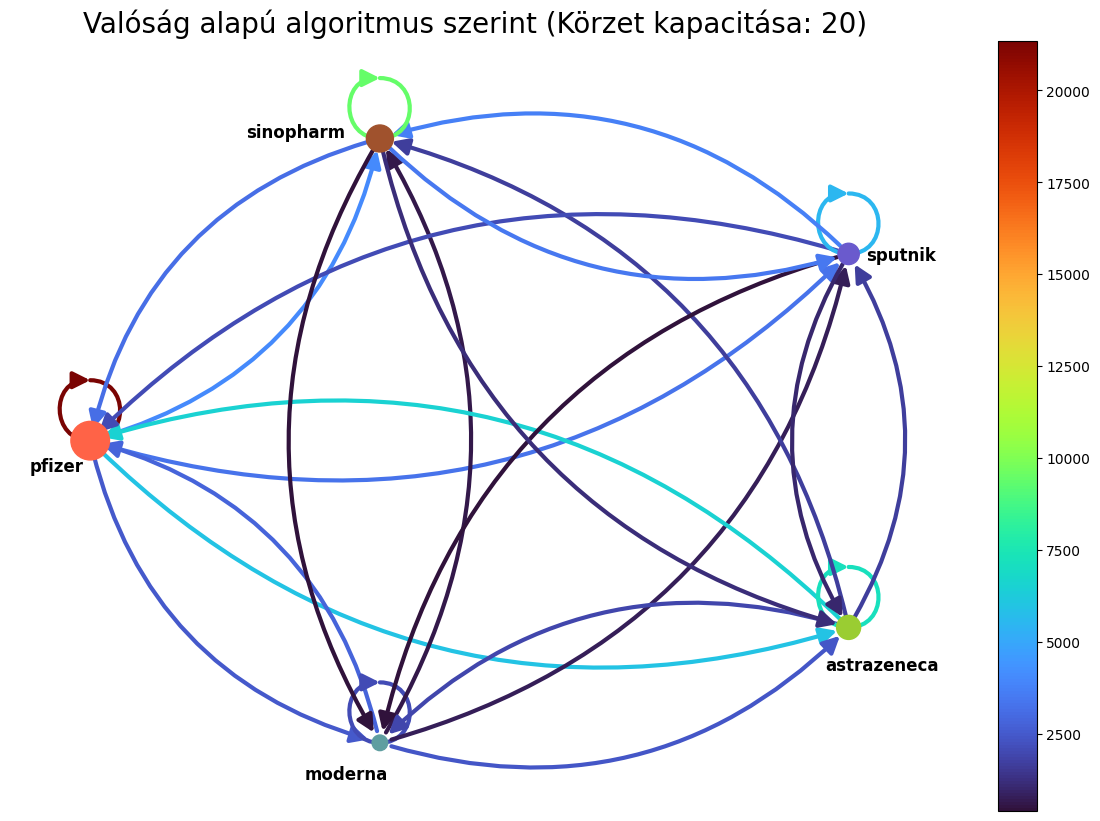

In [10]:
def print9(world: World, title, multiplier):
    vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
    refused_vaccine = [0] * len(vaccine_name_list)
    vacc_ref_pair = {}
    temp = []
    ref_matrix = np.zeros( (5, 5) )

    for dl in world.district_list:
        for vl in dl.vaccine_list:
            for vi in range(len(vaccine_name_list)):
                if vaccine_name_list[vi] == vl.name:
                    refused_vaccine[vi] += vl.refused_counter
                    break

    for i in range(len(vaccine_name_list)):
        vacc_ref_pair[vaccine_name_list[i]] = []
        temp.append(refused_vaccine[i])
        vacc_ref_pair[vaccine_name_list[i]].extend(temp)
        temp.clear()

    for dl in world.district_list:
        for pl in dl.people_list:
            if pl.offered_counter > 1 and pl.accepted:
                ref = pl.offered_counter-1
                for rl in pl.rejected_list:
                    if rl[1] > 0:
                        rej_vacc_index = vaccine_name_list.index(rl[0])
                        acc_vacc_index = vaccine_name_list.index(pl.selected_vaccine)
                        ref_matrix[acc_vacc_index][rej_vacc_index] += ref   #(accepted(standing) x rejected(lying))
                print(acc_vacc_index," - ",rej_vacc_index," : ",ref_matrix[acc_vacc_index][rej_vacc_index])

    print(np.matrix(ref_matrix))

    vaccinatio_graph = nx.MultiDiGraph()

    for vacc in vacc_ref_pair.keys():
        vaccinatio_graph.add_node(vacc, size = vacc_ref_pair[vacc][0])

    it = np.nditer(ref_matrix, flags=['multi_index'])
    for x in it:
        acc_vacc = vaccine_name_list[it.multi_index[0]]
        rej_vacc = vaccine_name_list[it.multi_index[1]]
        if x > 0:
            vaccinatio_graph.add_edge(acc_vacc, rej_vacc, weight = x, rad=0.1)


    plt.figure(figsize=(15, 10))

    out_deg = []
    arc_rad = 0.3

    weights = nx.get_edge_attributes(vaccinatio_graph,'weight').values()
    _weights = list(weights)
    _norm_weights = []
    for w in range(len(_weights)):
        _norm_weights.append(float(_weights[w]))

    edges = vaccinatio_graph.edges()
    for v in vacc_ref_pair.keys():
        out_deg.append(vacc_ref_pair[v][0]*multiplier)

    pos = nx.shell_layout(vaccinatio_graph)
    pos_higher = {}
    for k, v in pos.items():
        pos_higher[k] = (v[0], v[1])
    pos_higher["pfizer"] =(pos_higher["pfizer"][0]-0.08, pos_higher["pfizer"][1]-0.08)
    pos_higher["moderna"] =(pos_higher["moderna"][0]-0.08, pos_higher["moderna"][1]-0.1)
    pos_higher["astrazeneca"] =(pos_higher["astrazeneca"][0]+0.08, pos_higher["astrazeneca"][1]-0.12)
    pos_higher["sputnik"] =(pos_higher["sputnik"][0]+0.125, pos_higher["sputnik"][1]-0.005)
    pos_higher["sinopharm"] =(pos_higher["sinopharm"][0]-0.2, pos_higher["sinopharm"][1]+0.02)
        
    M = vaccinatio_graph.number_of_edges()
    edge_colors = []
    for color in range(M):
        edge_colors.append(float(_norm_weights[color] + 2))
    cmap = plt.cm.turbo

    _edges = nx.draw_networkx_edges(vaccinatio_graph, pos, edge_color=edge_colors, edge_cmap=cmap, width=3, edgelist=edges, connectionstyle=f'arc3, rad = {arc_rad}', arrows=True, arrowsize=25, arrowstyle = '-|>')
    nx.draw_networkx_nodes(vaccinatio_graph, pos, node_color=['tomato', 'cadetblue', 'yellowgreen', 'slateblue', 'sienna'], node_size=out_deg)
    nx.draw_networkx_labels(vaccinatio_graph, pos_higher, font_size=12, font_color='k', font_weight='bold')

    pc = mpl.collections.PatchCollection(_edges, cmap=cmap)
    pc.set_array(edge_colors)

    ax = plt.gca()
    plt.colorbar(pc, ax=ax)
    ax.set_axis_off()
    plt.title(title, fontsize = 20)
    plt.show()
    
print9(world, f'Preferencia alapú algoritmus szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})', 0.12) #pref
print9(world2, f'Valóság alapú algoritmus szerint (Körzet kapacitása: {Constants.currentCfg.district_capacity})', 0.02) #rand